<a href="https://colab.research.google.com/github/VarnikaKamra/ds-projects/blob/main/Calgary%20Crime%20Data%20analysis%20%26%20Neural%20Network/Calgary_Crime_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Calgary Crime Data Analysis and Neural Network Prediction**

The aim of this project is to use the Crime and Disorder Data provided by the City of Calgary's data website to analyze the data and predict the number of crimes that will occur in the future. The data is from 2018 to 2024 and contains the number of crimes that occurred in Calgary for each month. After throughly analyzing the data, I will be building a neural network model and optimizing it to predict the number of crimes that will occur in the future.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/Community_Crime_Statistics_20240522.csv")
df.head()

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


Since the dataset is aplhabetically sorted by the community name, the data is not in chronological order

**Data Preprocessing**

In [9]:
df.shape

(70661, 5)

In [3]:
df.info()

#No null values in the dataset
#The dataset is pretty clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70661 entries, 0 to 70660
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Community    70661 non-null  object
 1   Category     70661 non-null  object
 2   Crime Count  70661 non-null  int64 
 3   Year         70661 non-null  int64 
 4   Month        70661 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.7+ MB


In [4]:
#Unique values in the data
for i in df.columns:
  print(i,df[i].nunique())

Community 296
Category 9
Crime Count 77
Year 7
Month 12


In [5]:
df.describe()

#Possibly an outlier in Crime Count

,Crime Count,Year,Month
count,70661.000000,70661.000000,70661.000000
mean,2.855748,2020.618616,6.369242
std,3.664965,1.825330,3.451445
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,2.000000,2021.000000,6.000000
75%,3.000000,2022.000000,9.000000
max,111.000000,2024.000000,12.000000


In [8]:
df['Category'].value_counts().index

Index(['Theft FROM Vehicle', 'Theft OF Vehicle', 'Break & Enter - Commercial',
       'Assault (Non-domestic)', 'Violence  'Other' (Non-domestic)',
       'Break & Enter - Dwelling', 'Break & Enter - Other Premises',
       'Street Robbery', 'Commercial Robbery'],
      dtype='object', name='Category')

**Exloratory Data Analysis**



Community Prediction

Text(0, 0.5, ' ')

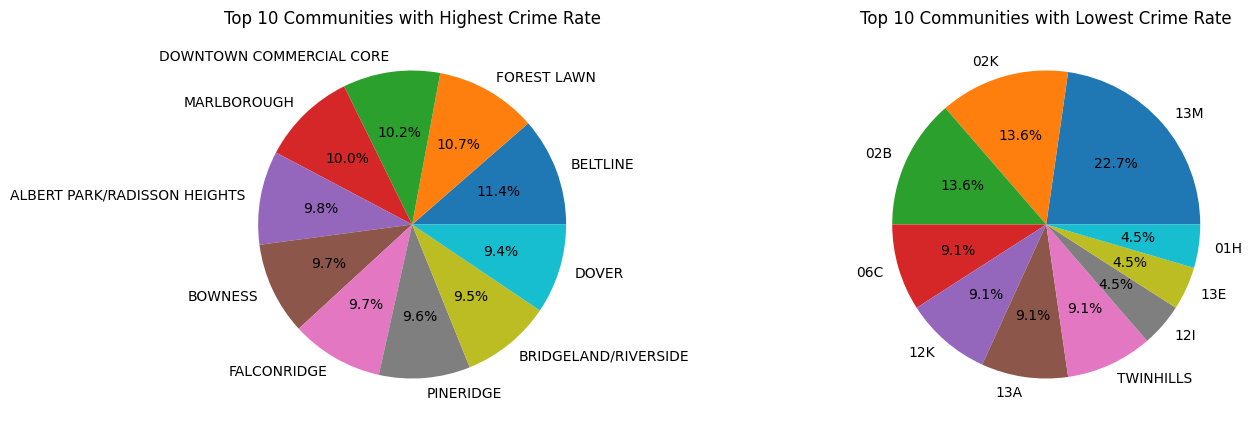

In [12]:

fig,ax = plt.subplots(1,2,figsize=(15,5))

#Top 10 Communities with highest Crime Rate

df['Community'].value_counts().head(10).plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Top 10 Communities with Highest Crime Rate')
ax[0].set_ylabel(" ")

#Top 10 Communities with Lowest Crime Rate
df['Community'].value_counts().tail(10).plot.pie(autopct='%1.1f%%',ax=ax[1])
ax[1].set_title('Top 10 Communities with Lowest Crime Rate')
ax[1].set_ylabel(" ")

These pie charts show the distribution of crimes in each community.

 In the first pie chart, Beltline is the most dangerous community in Calgary with 11.4% of the top crimes in number, followed by Forest Lawn with 10.7% and Downtown Commercial Core with 10.2%. In the second pie chart, the safest community is 13M with 22.7% of the least crimes in number, followed by 02K with 13.6% and 02B with 13.6%.

*This is note that all these observations are without any bias and completely based on the data from the city of Calgary website.*

Crime Category Distribution

Text(0, 0.5, ' ')

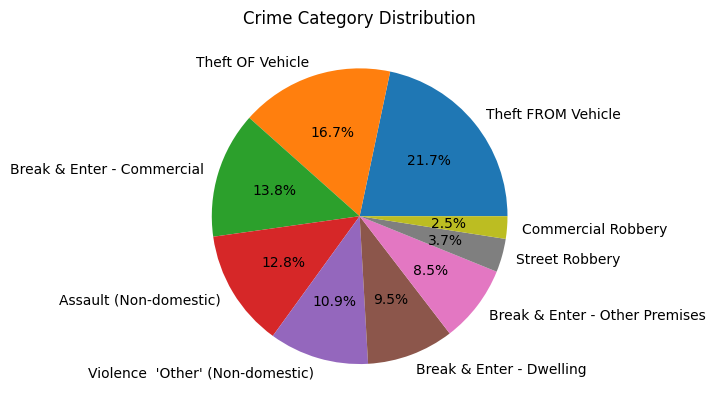

In [13]:
df['Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Crime Category Distribution')
plt.ylabel(" ")

Crime Reporting Over the Years

In [16]:
df['Year'].value_counts()

,count
Year,
2019,11816
2018,11629
2022,11435
2020,10944
2023,10918
2021,10838
2024,3081


Text(0.5, 1.0, 'Crime Reporting Over the Years')

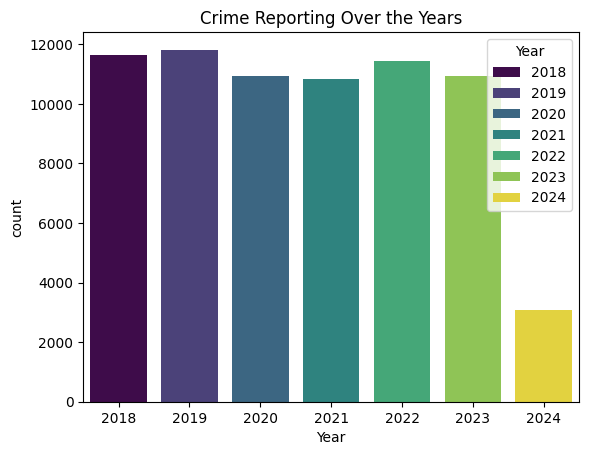

In [15]:
sns.countplot(data=df,x='Year',hue ='Year',palette='viridis').set_title('Crime Reporting Over the Years')

Note: The crime reportings in 2024 are less due to limited data till April 2024.

Crime Reporting by Month

<ipython-input-17-eb8bbd04e879>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month',data=df,palette='viridis').set_title('Crime Reporting by Month')


Text(0.5, 1.0, 'Crime Reporting by Month')

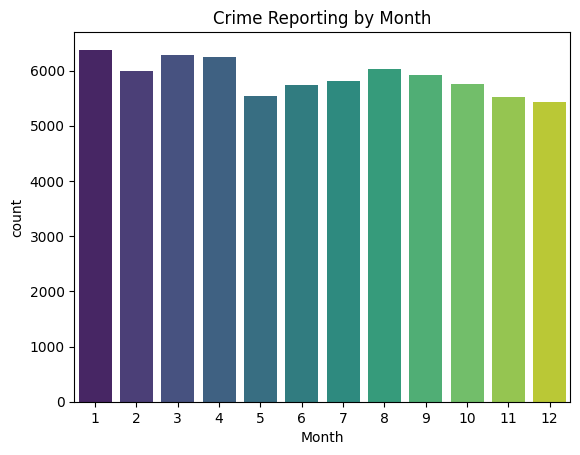

In [17]:
sns.countplot(x='Month',data=df,palette='viridis').set_title('Crime Reporting by Month')

Community and Category Analysis

Text(0.5, 1.0, 'Top 5 Most safest Community and Crime Category')

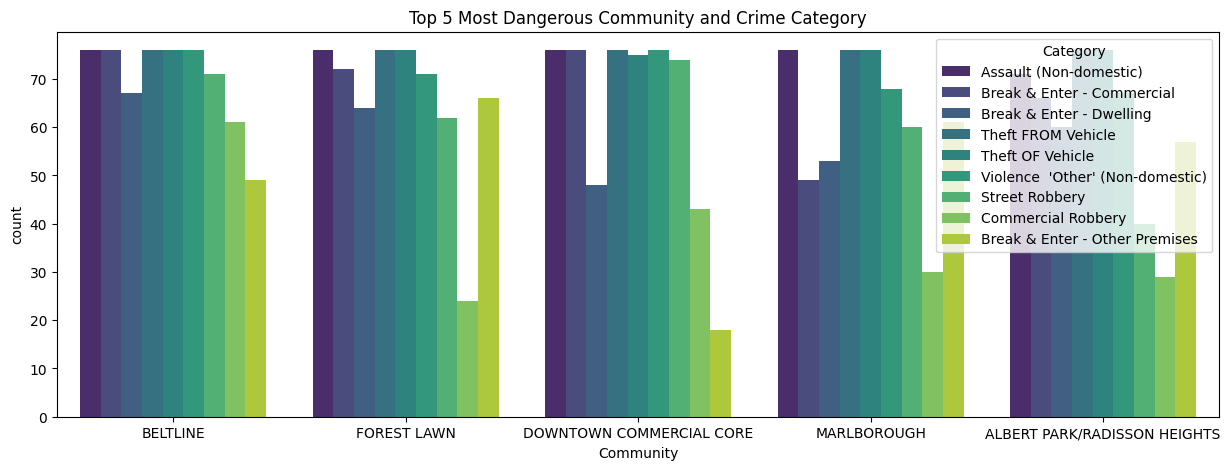

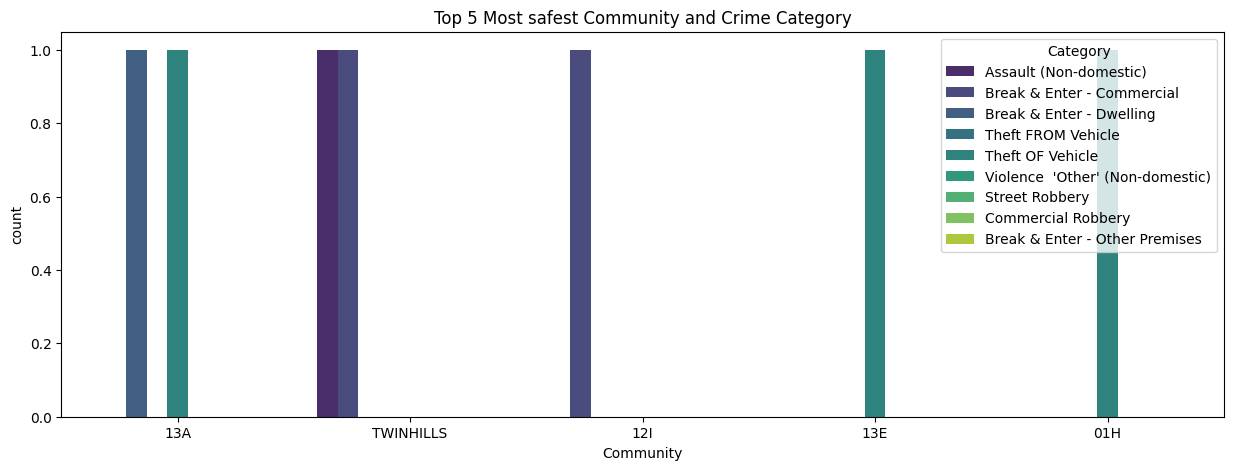

In [19]:
plt.figure(figsize=(15,5))

sns.countplot(data=df,x='Community',hue='Category',order = df['Community'].value_counts().head(5).index,palette='viridis').set_title('Top 5 Most Dangerous Community and Crime Category')
sns.move_legend(plt.gca(), "upper right")
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community', data = df, hue = 'Category', palette='viridis', order = df['Community'].value_counts().tail(5).index).set_title('Top 5 Most safest Community and Crime Category')



These two graphs shows the analysis of communities with the crime category. This help us to visualize the pattern of crime in each community. We can see that certain cateogries are more common in certain communities than others. In the top 5 dangerous communities, Forest Lawn has the highest of Break & Enter - other premises, Malbrough has the lowest Commerical Robbery. These are the few examples of the analysis.

Year and Category Analysis

Text(0.5, 1.0, 'Crime Reportings by Year and Crime Category')

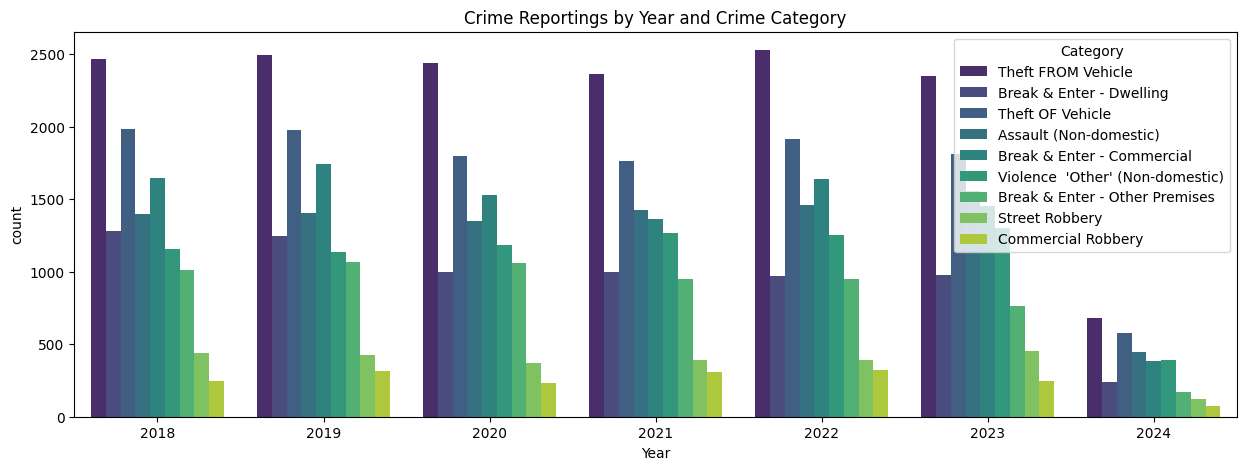

In [20]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Year', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Year and Crime Category')


Month and Category Analysis

Text(0.5, 1.0, 'Crime Reportings by Year and Crime Category')

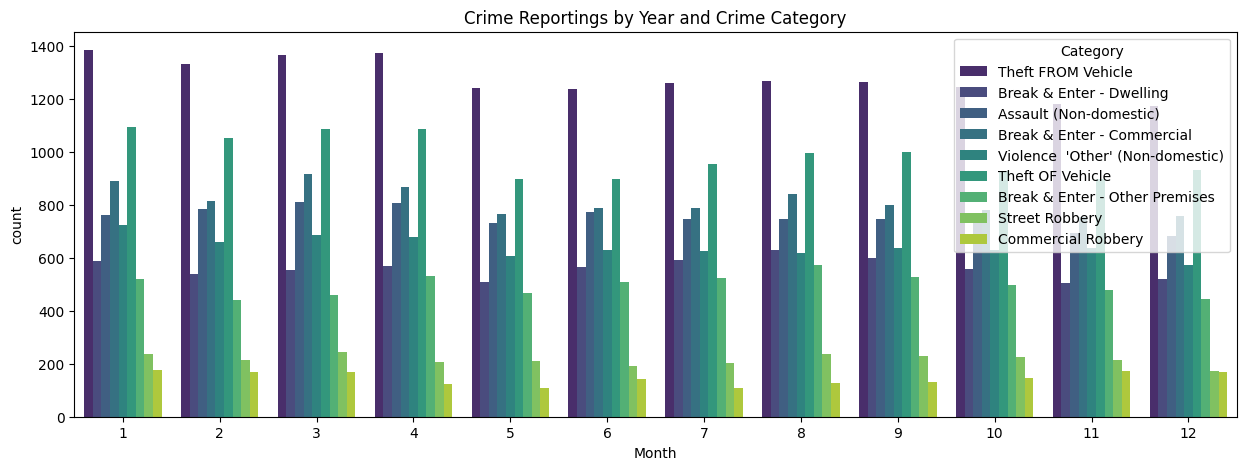

In [21]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Month', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Year and Crime Category')


Data preprocessing

In [22]:
#Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Community'] = le.fit_transform(df['Community'])
df['Category'] = le.fit_transform(df['Category'])

df.head()

,Community,Category,Crime Count,Year,Month
0,0,0,1,2022,11
1,0,1,1,2019,6
2,0,1,1,2019,8
3,0,1,2,2020,3
4,0,1,2,2020,7


Building a Neural Networ Model

In [27]:

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length)].to_numpy()
        y = data.iloc[i + seq_length]['Crime Count']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [28]:
seq_length = 3
X, y = create_sequences(df, seq_length)

Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Building and Training the LSTM Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [31]:
#Build the LSTM Model

model = Sequential()
model.add(LSTM(units=50, activation ='relu', input_shape=(seq_length, X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1))

#Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

#Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 64.2076 - val_loss: 8.2620
Epoch 2/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 8.9201 - val_loss: 7.2946
Epoch 3/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - loss: 7.4193 - val_loss: 5.6172
Epoch 4/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 7.9121 - val_loss: 6.6250
Epoch 5/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 6.8230 - val_loss: 5.4563
Epoch 6/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 6.9074 - val_loss: 4.7461
Epoch 7/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 6.3697 - val_loss: 5.0541
Epoch 8/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 5.7583 - val_loss: 4.8041
Epoch 9/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 6.4451 - val_loss: 5.0799
Epoch 10/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 6.2625 - val_loss: 4.9843
Epoch 11/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 5.5281 - val_loss: 5.0889
Epoch 1

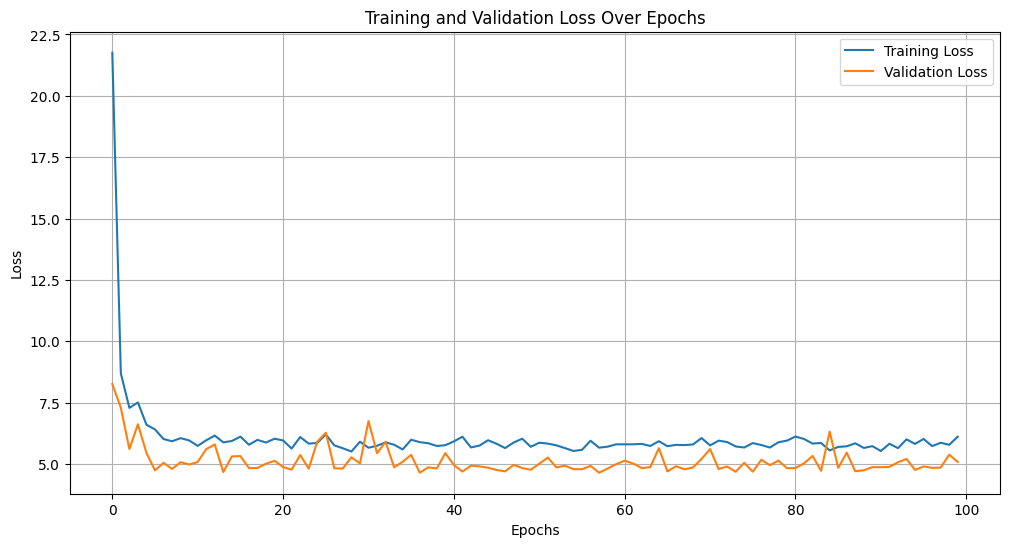

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
#Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

#Predictions
y_pred =model.predict(X_test)

print(f'Predictions: {y_pred.flatten()}')
print(f'True Values: {y_test.flatten()}')


332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8684
Test Loss: 5.005606651306152
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions: [2.6425333 1.9245082 1.9245082 ... 3.031568  1.9245082 2.4645288]
True Values: [2 1 1 ... 1 2 2]


Model Evaluation

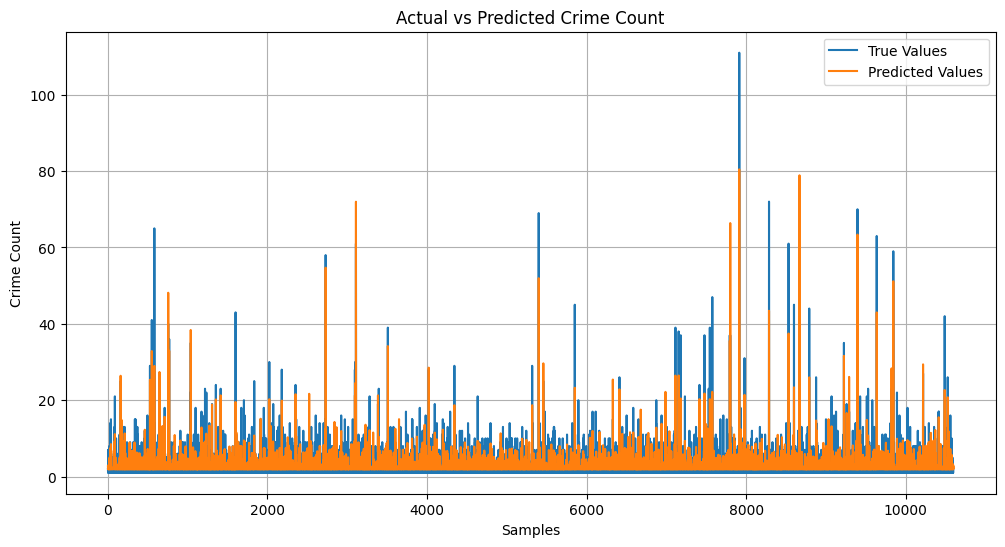

In [34]:
#Actual vs Predicted Values

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Crime Count')
plt.xlabel('Samples')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()


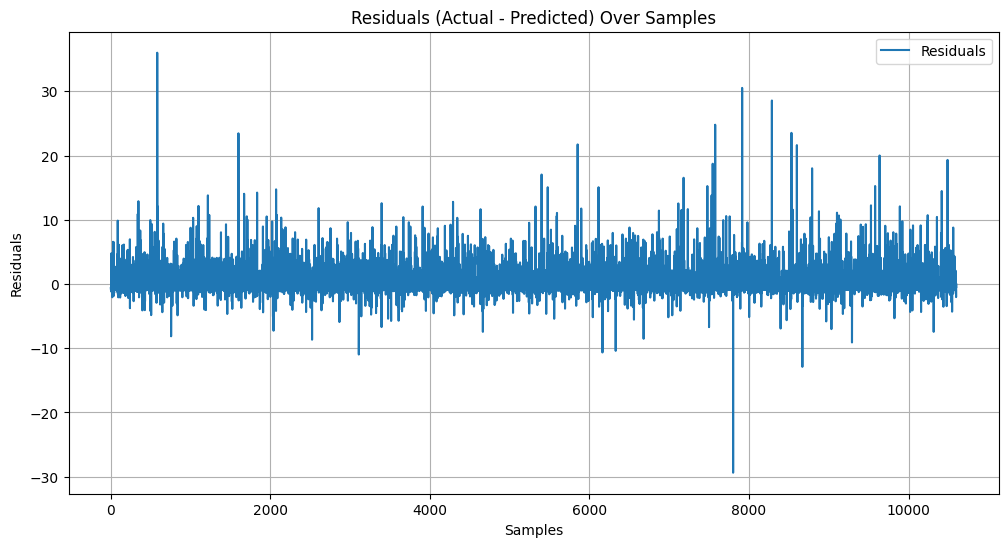

In [36]:
#Residual Plot

# Calculating residuals
residuals = y_test.flatten() - y_pred.flatten()

# Plotting residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals (Actual - Predicted) Over Samples')
plt.xlabel('Samples')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()